# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time

import warnings
warnings.filterwarnings('ignore')

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [ ]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)

    out = (arr - arr.mean(axis=0)) / arr.std(axis=0) # axis=0 calculates property in a column (row by row), axis=1 in a row (colomn by column)

    ### END Solution (do not delete this comment)
    return out

# Check the results:
sample_array = np.array([[1, 2, 3],
                         [4, 5, 6],
                         [7, 8, 9]])

norm_array = normalize(sample_array)

print(norm_array)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

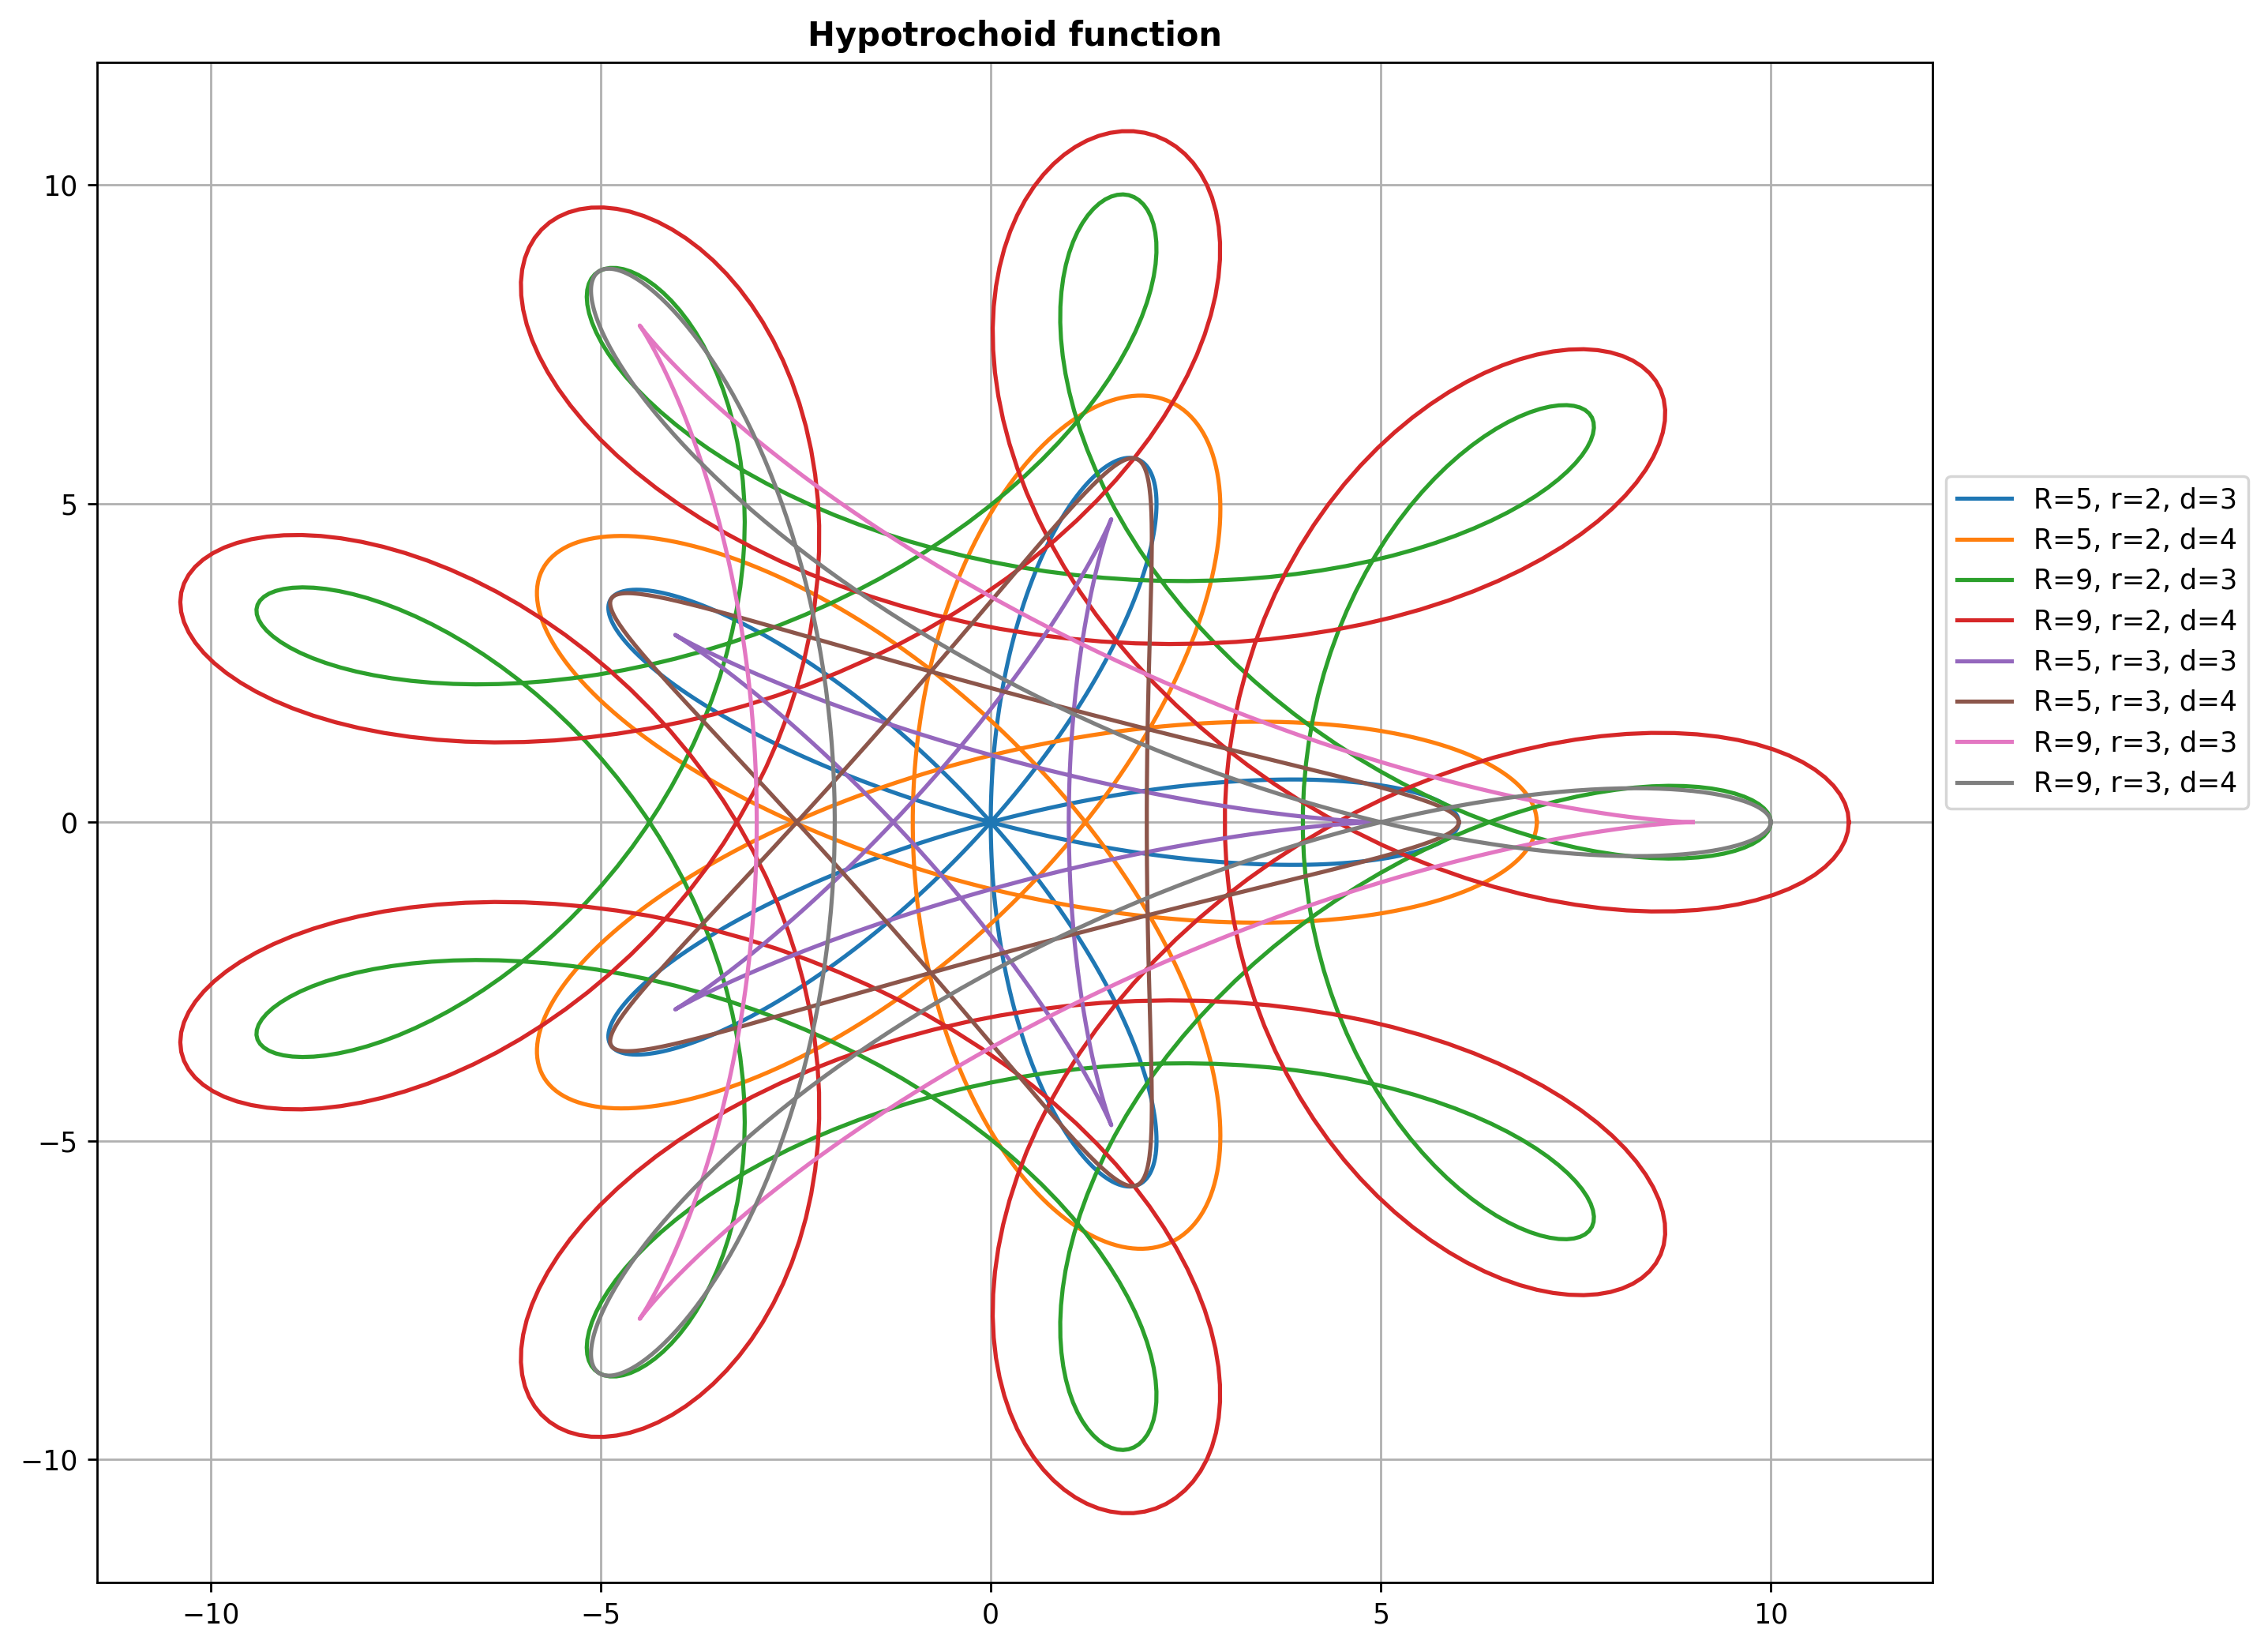

In [6]:
### BEGIN Solution (do not delete this comment)

def Hypotrochoid(R, r, d)->tuple:
  t = np.linspace(0, 2*np.pi*np.lcm(r, R)/R, 600)
  x = (R-r)*np.cos(t) + d*np.cos((R-r)/r*t)
  y = (R-r)*np.sin(t) - d*np.sin((R-r)/r*t)
  return x, y

R_var = (5, 9)
r_var = (2, 3)
d_var = (3, 4)

plt.figure(figsize=(12,10), dpi=250)
for r in r_var:
    for R in R_var:
        for d in d_var:
            plt.plot(*Hypotrochoid(R, r, d), label=f'R={R}, r={r}, d={d}')
plt.legend(fancybox=True, loc='lower left', bbox_to_anchor=(1, 0.5))
plt.title('Hypotrochoid function', fontweight='bold')
plt.grid(True)

plt.show()

### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

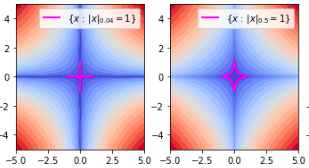

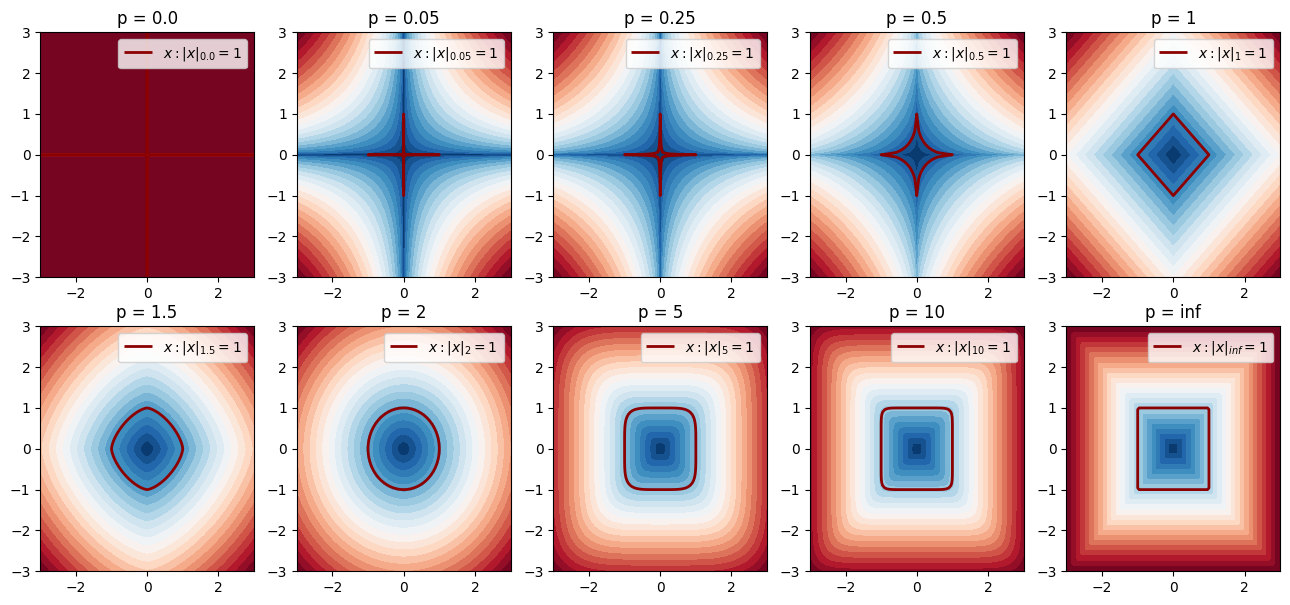

In [ ]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

for p, ax in zip(p_values, axes.flat):

    ### BEGIN Solution (do not delete this comment)

    zz = np.linalg.norm(np.c_[xx.ravel(), yy.ravel()], axis=1, ord=p).reshape(xx.shape)
    ax.contourf(xx, yy, zz, levels=np.linspace(zz.min(), zz.max(), 25), cmap=plt.cm.RdBu_r)

    # countour plot fot the norm level equal to 1:
    L = ax.contour(xx, yy, zz, levels=[1], linewidths=2, colors="darkred") # assign variable to further access countrplot elements for legend plotting
    ax.legend(L.legend_elements()[0], [f'$x : |x|_{{{p}}}=1$'])
    ax.set_title(f'p = {p}')

    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [ ]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

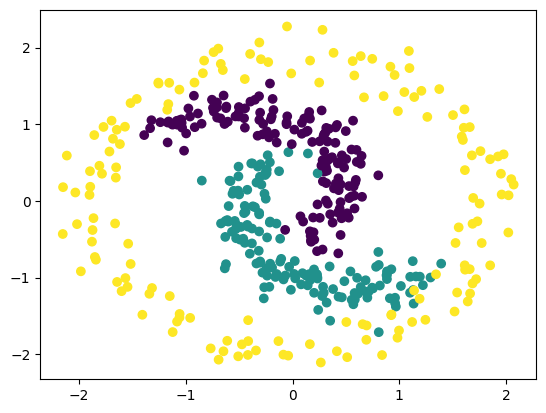

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can read about Support Vector Machine (SVM) here: https://scikit-learn.org/stable/modules/svm.html

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

# ![image](data/ex.png)

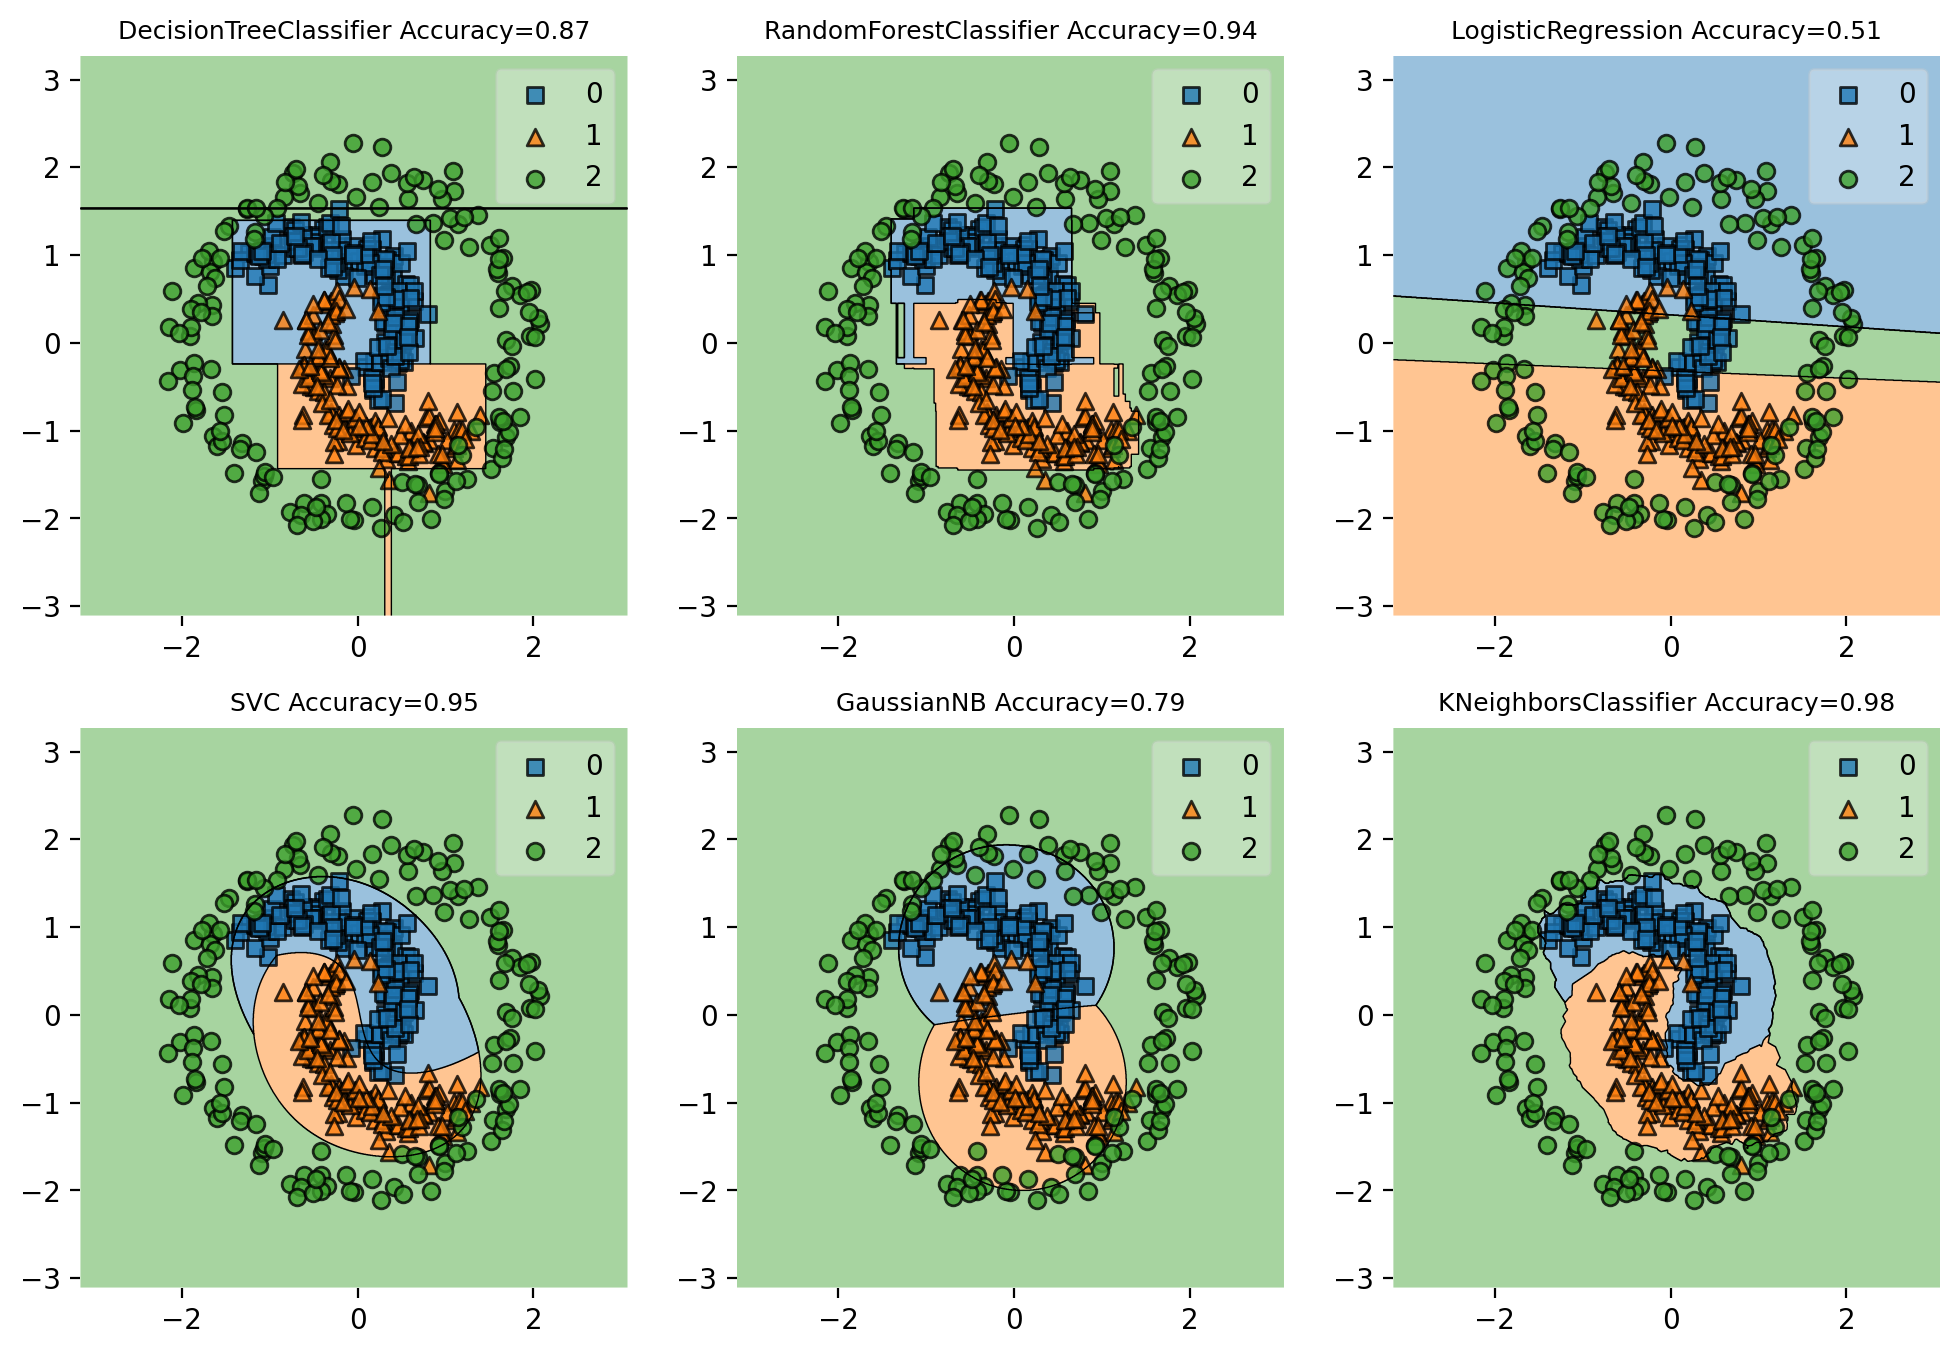

In [ ]:
### BEGIN Solution (do not delete this comment)

seed = 1

clf_list = (
    DecisionTreeClassifier(max_depth=4, random_state=seed),
    RandomForestClassifier(n_estimators=20, max_depth=4, n_jobs=-1, random_state=seed),
    LogisticRegression(n_jobs=-1, random_state=seed),
    SVC(kernel='rbf'),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    )

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8), dpi=200)

for clf, ax in zip(clf_list, axes.flat):
    clf.fit(X, y)
    y_predict = clf.predict(X)

    fig = plot_decision_regions(X=X, y=y, clf=clf, ax=ax) #from mlxtend library

    ax.set_title(f'{type(clf).__name__} Accuracy={accuracy_score(y, y_predict):.2f}', fontsize=9)

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

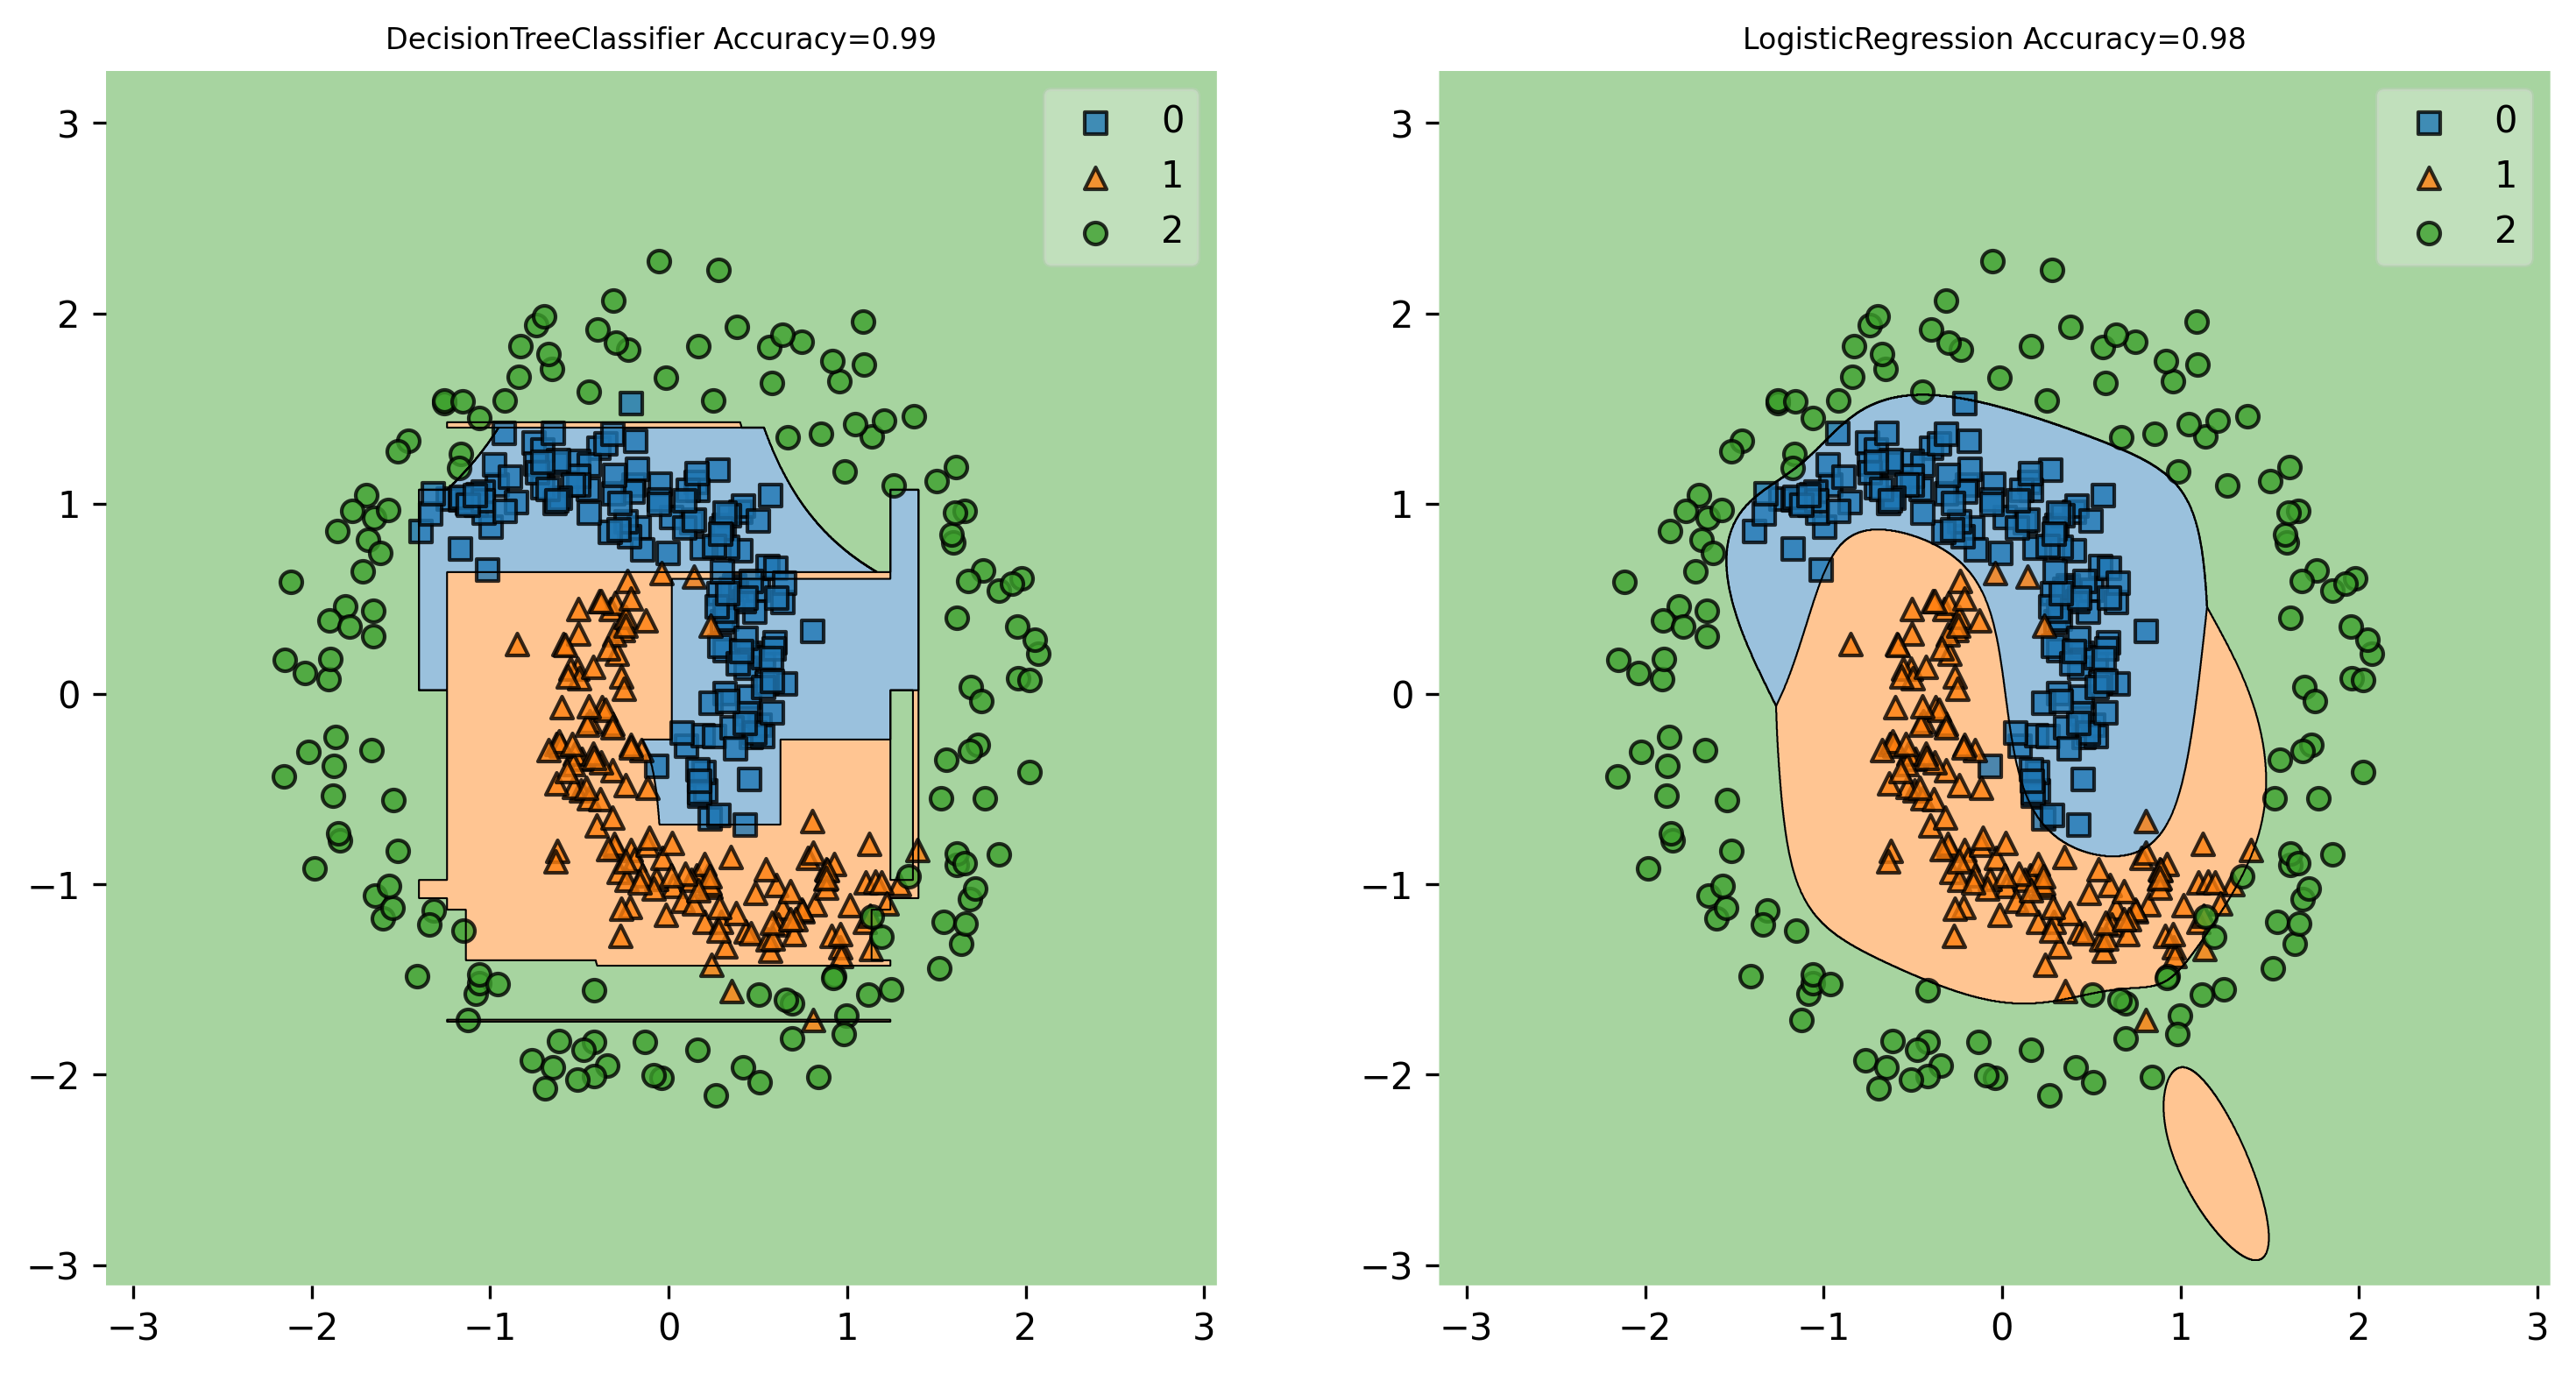

In [ ]:
### BEGIN Solution (do not delete this comment)

pipe_1 = Pipeline([('polynominal_features', PolynomialFeatures(2)),
                   ('clf', DecisionTreeClassifier(max_depth=6, random_state=seed))
                   ])

pipe_2 = Pipeline([('scaler', StandardScaler()),
                  ('polynominal_features', PolynomialFeatures(10)),
                   ('clf', LogisticRegression(random_state=seed))
                   ])

pipe_1.fit(X, y)
pipe_2.fit(X, y)

# calculating y_pred for bouth pipes to estimate accuracy propely:
y_pipe_1 = pipe_1.predict(X)
y_pipe_2 = pipe_2.predict(X)


# plotting decision rules in original feature space:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2, dpi=300)
plot_decision_regions(X, y, pipe_1, ax=ax1)
ax1.set_title(f"{type(pipe_1['clf']).__name__} Accuracy={accuracy_score(y, y_pipe_1):.2f}", fontsize=8)

plot_decision_regions(X, y, pipe_2, ax=ax2)
ax2.set_title(f"{type(pipe_2['clf']).__name__} Accuracy={accuracy_score(y, y_pipe_2):.2f}", fontsize=8)

plt.show()

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

For the Decision Tree classifier, I chose polynomial features of degree 2 to capture non-linear relationships in the data. Decision Trees can represent complex decision boundaries, and adding polynomial features allows the model to better fit intricate patterns and dependencies in the data. The addition of squared features and interaction terms enhances the flexibility of the decision boundaries, making it more suitable for datasets with non-linear structures. Also, I have increased max_depth from 4 to 6, it also significantly increased the accuracy!

For the Logistic Regression classifier, polynomial features of degree 10 were chosen to introduce non-linearities into the decision boundary. Logistic Regression inherently assumes a linear decision boundary, and by incorporating polynomial features, we allow the model to capture more complex relationships in the data. This is particularly useful when the true decision boundary has non-linear components, enabling Logistic Regression to better approximate the underlying patterns and improve its accuracy. Also, to decrease the variance of the data the StandardScaling was done.

## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [ ]:
data = pd.read_csv('Data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
327,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56.0,55.83
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7.0,41.67
736,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,7.0,12.05


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [ ]:
### BEGIN Solution (do not delete this comment)

import itertools

seed = 1

def customGridSearch(Regressor, X_train : np.array, y_train : np.array, X_val : np.array, y_val : np.array, params_grid : dict) -> tuple:
    """Performs a grid search over a hyperparameters space, determining the best hyperparameters on a validation data.

    Args:
        Regressor: Sklearn type regressor with fit/predict methods
        X_train (np.array): train features
        y_train (np.array): train target
        X_val (np.array): validation features
        y_val (np.array): validation target
        params_grid (dict): hyperparameters grid for greed optimization
        """

    # getting all possible combinations of hyperparameters from param_grid:
    keys, values = zip(*params_grid.items())
    params_permutations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    greed_search_results = {'mse_train' : [], 'mse_val' : []}
    for params in params_permutations:
        clf = Regressor(**params, n_jobs=-1, random_state=seed)
        clf.fit(X_train, y_train)
        greed_search_results['mse_train'].append(mse(y_train, clf.predict(X_train)))
        greed_search_results['mse_val'].append(mse(y_val, clf.predict(X_val)))

    # finding the best validation score and corresponding hyperparameters:
    best_val_score = min(greed_search_results['mse_val'])
    best_index = greed_search_results['mse_val'].index(best_val_score)
    train_score = greed_search_results['mse_train'][best_index]
    best_params = params_permutations[best_index]
    return train_score, best_val_score, best_params

params_grid = {'n_estimators'  : [20, 40, 60, 100, 120], # number of trees in ansamble; too many trees -> overfit
               'max_depth' : [4, 6, 8, 10], # maximum depth of each tree in ansemble; too big depth -> overfit
               'min_samples_leaf' : [1, 2, 4, 6]}  # minumim number of samples in leaf; too small -> overfit

mse_train_et, mse_val_et, best_params_et = customGridSearch(ExtraTreesRegressor, X_train, y_train, X_val, y_val, params_grid)
mse_train_rf, mse_val_rf, best_params_rf = customGridSearch(RandomForestRegressor, X_train, y_train, X_val, y_val, params_grid)

et_clf = ExtraTreesRegressor(**best_params_et, n_jobs=-1, random_state=seed)
rf_clf = RandomForestRegressor(**best_params_rf, n_jobs=-1, random_state=seed)

# refit on a combined train + validation data:
et_clf.fit(X_train_val, y_train_val)
rf_clf.fit(X_train_val, y_train_val)

mse_test_et = mse(y_test, et_clf.predict(X_test))
mse_test_rf = mse(y_test, rf_clf.predict(X_test))

print('Random Forest MSE:')
print(f'\tTrain: {mse_train_rf:.2f}\n\tValidation: {mse_val_rf:.2f}\n\tTest: {mse_test_rf:.2f}')
print('Extra Trees MSE:')
print(f'\tTrain: {mse_train_et:.2f}\n\tValidation: {mse_val_et:.2f}\n\tTest: {mse_test_et:.2f}')

### END Solution (do not delete this comment)

Random Forest MSE:
	Train: 6.40
	Validation: 23.67
	Test: 24.16
Extra Trees MSE:
	Train: 5.24
	Validation: 19.81
	Test: 21.40


### Subproblem 5.2. Results explanation (1 point)

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

As evident from the results, the training score significantly outperforms the validation and test scores in both cases. This phenomenon could be attributed to the substantial depth of the trees (set at 10) and the minimum number of samples per leaf (set to 1) for both ensembles, as determined by the grid search. This combination of hyperparameters increases the risk of overfitting on the training set, where the model might memorize specific samples rather than learning general patterns from the data. Although the formal training set error is minimized, the model struggles to make generalized predictions.
In simple terms, the model's overreliance on memorization hinders its ability to generalize well to new data. Interestingly, the errors on the validation and test sets are comparable, with a slight advantage for the validation set. While the formal grid search aimed to minimize the error on the validation set, the proximity of the errors suggests that the chosen hyperparameters may not be optimizing the model for improved generalization.
The ExtraTreesRegressor algorithm, on the other hand, exhibits superior performance on the testing data. One plausible explanation lies in the key difference between the two algorithms: Random Forest utilizes bootstrap sampling, introducing more diversity in the data, while ExtraTrees employs the entire original dataset for splitting nodes randomly. The use of bootstrap in Random Forest may elevate variance due to increased data diversification. In contrast, ExtraTrees, by randomly splitting at each node, tends to decrease variance, and its use of the entire dataset, instead of bootstrapped samples, additionally mitigates bias. This configuration results in better performance when applied to new, unseen data.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your\_accuracy} - \text{sklearn\_accuracy}| \leq 0.005
\,. $$

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

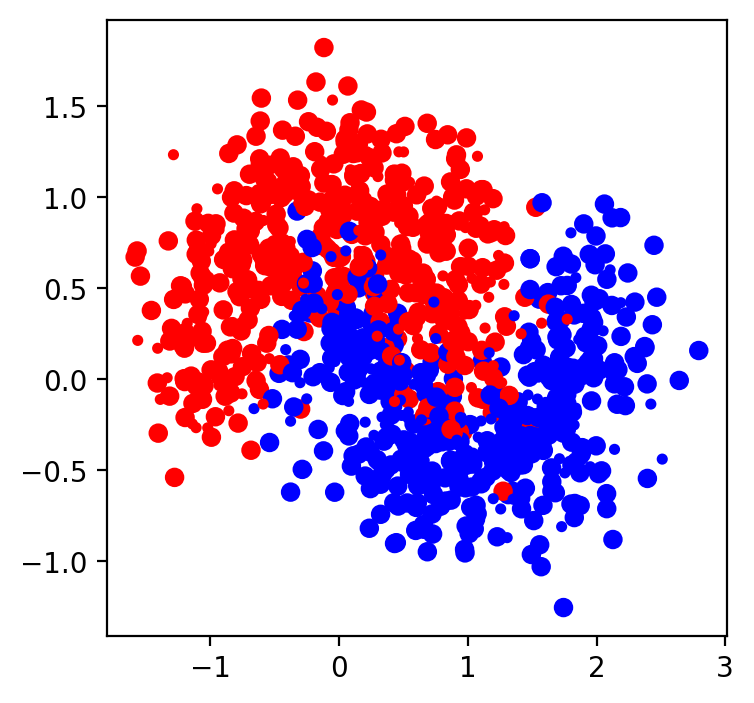

In [ ]:
# Plot the training points
plt.figure(figsize=(4, 4), dpi=200)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [ ]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.

    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)

    error = np.sum(distribution[y !=y_pred_t])
    alpha = 0.5 * np.log((1 - error) / (error + 1e-10*(error == 0))) # add small value to avoid log(inf) in case of error=0

    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights

    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)

    distribution *= np.exp(-alpha_t * y_pred_t * y)
    distribution /= np.sum(distribution) #normalization

    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [ ]:
class Boosting():
    """
    Generic class for construction of boosting models

    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution

    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)

            # make a prediction
            y_pred = self.classifiers[-1].predict(X)

            #update alphas, append new alpha to self.alphas
            alpha = ada_boost_alpha(y, y_pred, distribution)
            self.alphas.append(alpha)

            # update distribution and normalize
            distribution = ada_boost_distribution(y, y_pred, distribution, alpha)

            ### END Solution (do not delete this comment)


    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])

        ### BEGIN Solution (do not delete this comment)

        #get the weighted votes of the classifiers
        out = np.sign(np.sum([clf.predict(X) for clf in self.classifiers], axis=0) + .1) # add small value to avoid 0 labels in signum

        ### END Solution (do not delete this comment)

        return out

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [ ]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.885
accuracy ada_boost_sklearn: 0.89


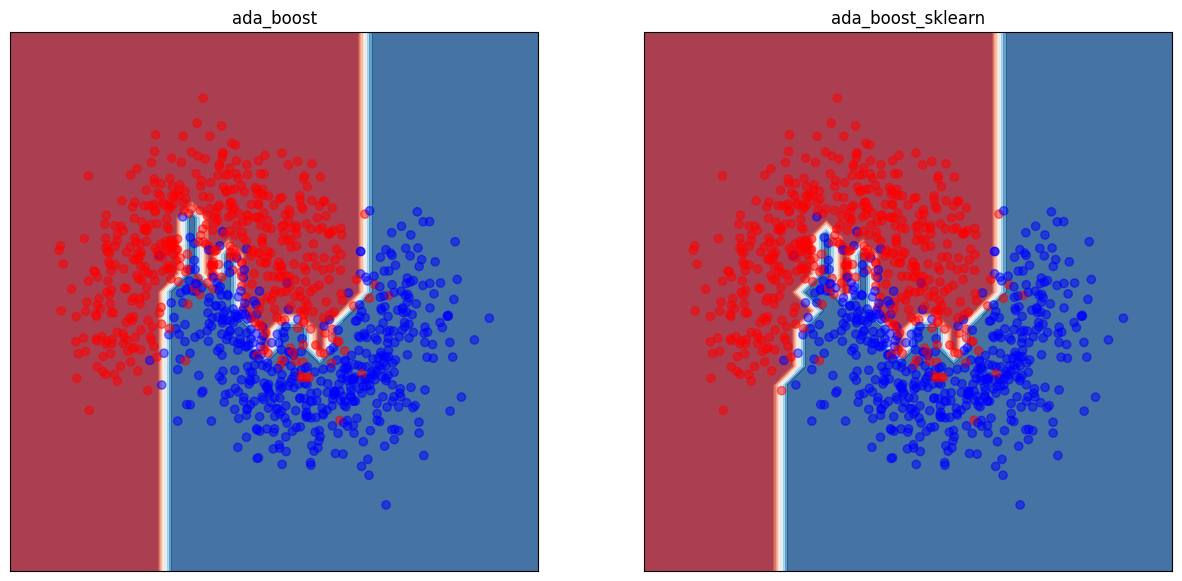

In [ ]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions.

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('Data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances.

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for XGBoost: 0.159
Training time for RandomForest: 0.452
Average precision score for XGBoost: 0.69011
Average precision score for Random Forest: 0.70655


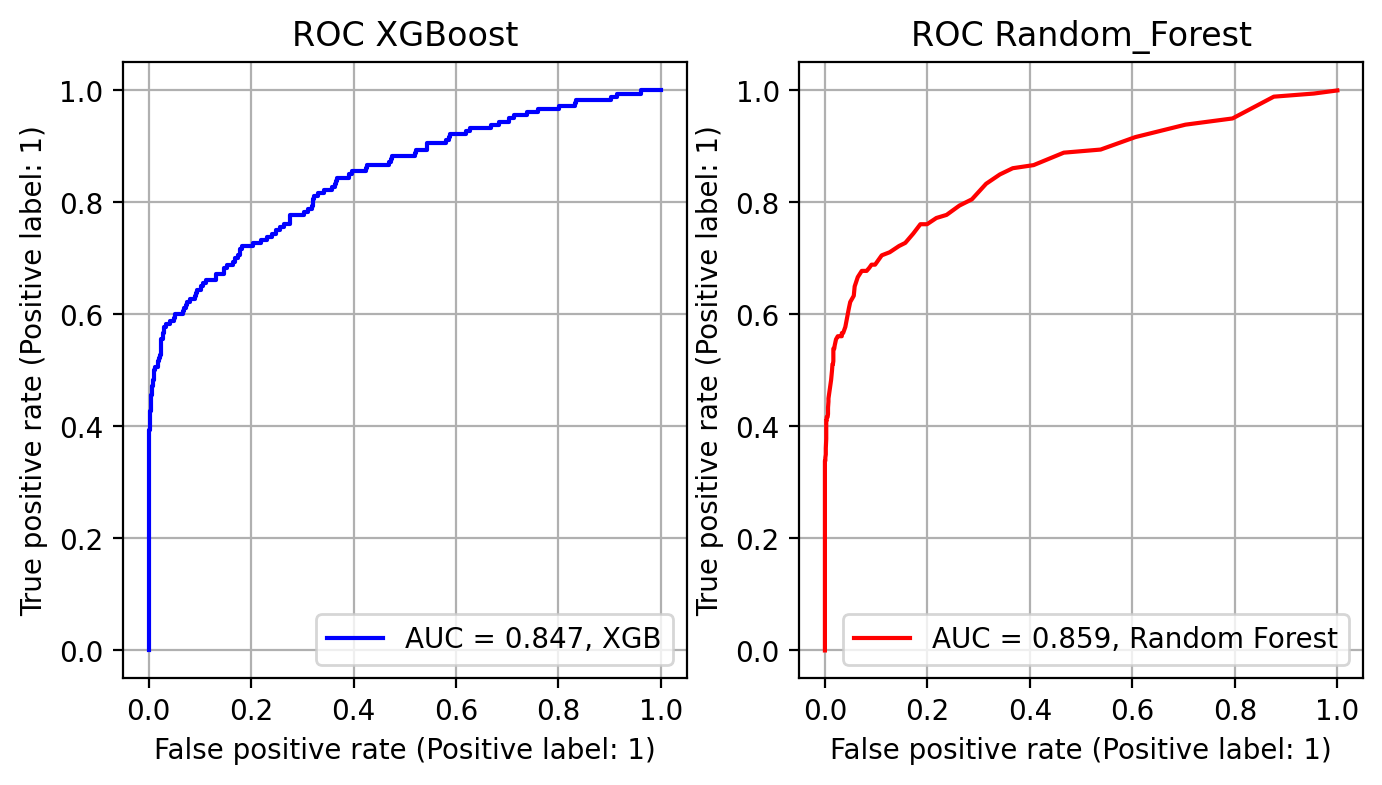

In [ ]:
### BEGIN Solution (do not delete this comment)

from sklearn.metrics import average_precision_score, roc_curve, roc_auc_score

seed = 1

#XGBoost:
t_perf_1 = time.perf_counter()
xgb_classifier = XGBClassifier(random_state=seed)
xgb_classifier.fit(X_train, y_train)

print(f'Training time for XGBoost: {time.perf_counter() - t_perf_1:.3f}')

#RandomForest:
t_perf_2 = time.perf_counter()
RandForest = RandomForestClassifier(random_state=seed, n_jobs=-1)
RandForest.fit(X_train, y_train)

print(f'Training time for RandomForest: {time.perf_counter() - t_perf_2:.3f}')

# calculating probabilites for ROC AUC & avg. precision score:
y_prob_xgb, y_prob_RF = xgb_classifier.predict_proba(X_test)[:,1], RandForest.predict_proba(X_test)[:,1]

# calculating average precision scores:
y_test_xgb, y_test_RF = xgb_classifier.predict(X_test), RandForest.predict(X_test)

print(f'Average precision score for XGBoost: {average_precision_score(y_test, y_prob_xgb):.5f}')

print(f'Average precision score for Random Forest: {average_precision_score(y_test, y_prob_RF):.5f}')

# plotting ROC-curve:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), dpi=200)
ax1.plot(*roc_curve(y_test, y_prob_xgb)[:2], 'b', label = f'AUC = {roc_auc_score(y_test, y_prob_xgb):.3f}, XGB')
ax2.plot(*roc_curve(y_test, y_prob_RF)[:2], 'r', label = f'AUC = {roc_auc_score(y_test, y_prob_RF):.3f}, Random Forest')
ax1.set_title('ROC XGBoost')
ax2.set_title('ROC Random_Forest')

ax1.set_xlabel('False positive rate (Positive label: 1)')
ax1.set_ylabel('True positive rate (Positive label: 1)')

ax2.set_xlabel('False positive rate (Positive label: 1)')
ax2.set_ylabel('True positive rate (Positive label: 1)')

ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

plt.show()

### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

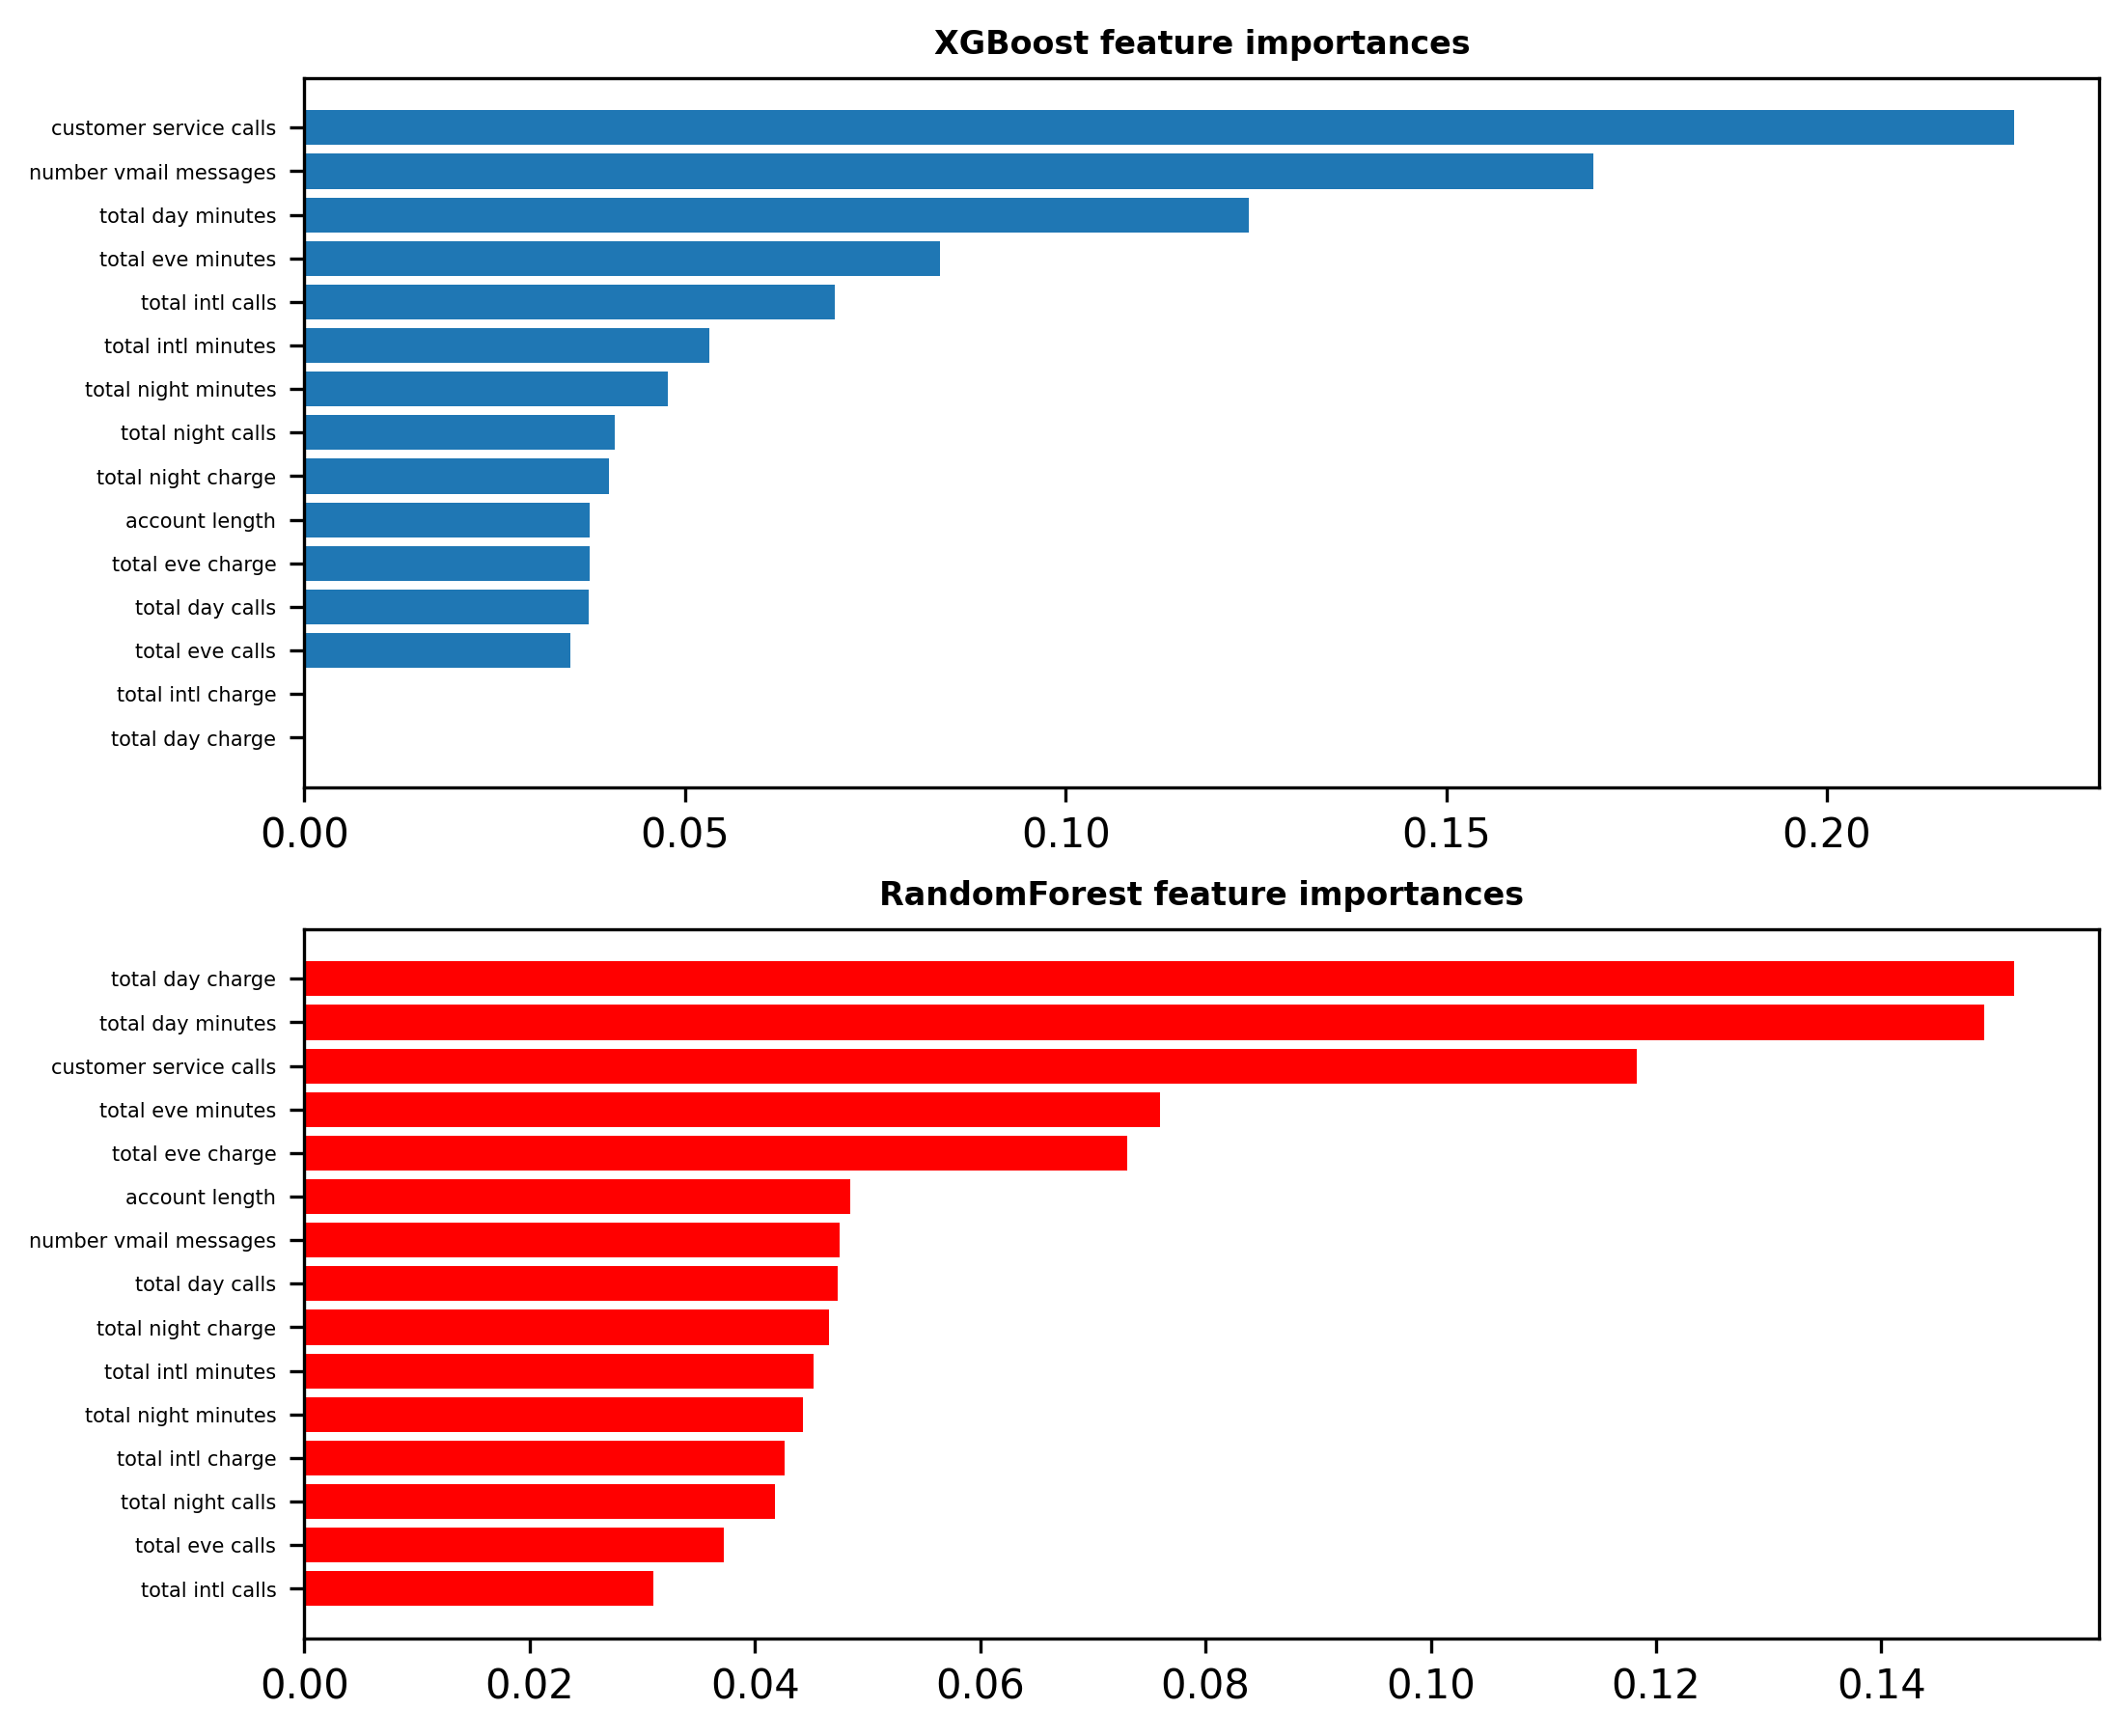

In [ ]:
### BEGIN Solution (do not delete this comment)

xgb_importances = xgb_classifier.feature_importances_
RF_importances = RandForest.feature_importances_

xgb_importances = pd.DataFrame(xgb_classifier.feature_importances_.T, index=X.columns).sort_values(0)
RF_importances = pd.DataFrame(RandForest.feature_importances_.T, index=X.columns).sort_values(0)

#Plotting:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 7), dpi=300)
ax1.barh(width=xgb_importances[0], y=xgb_importances.index)
ax2.barh(width=RF_importances[0], y=RF_importances.index, color='red')
ax1.set_title('XGBoost feature importances', fontsize=8, fontweight='bold')
ax2.set_title('RandomForest feature importances', fontsize=8, fontweight='bold')
ax1.yaxis.set_tick_params(labelsize=5)
ax2.yaxis.set_tick_params(labelsize=5)

plt.show()

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

The discrepancy in feature importance between XGBoost and RandomForest is notable, particularly regarding four features. XGBoost assigns zero importance to these features, which were ranked 12th, 9th, 5th, and 1st, respectively, by the RandomForest algorithm. This divergence in importance arises from the correlation among features in the dataset. Specifically, features like "total day charge" exhibit a perfect correlation (corr=1) with "total day minutes," and similar correlations are observed for other pairs ("total eve charge" with "total eve minutes," "total night charge" with "total night minutes," and "total intl charge" with "total intl minutes"). XGBoost appears to optimize its tree-building strategy by recognizing strongly correlated pairs and, in such cases, tends to utilize only one of the correlated features, leading to zero importance for the others. In contrast, RandomForest, with its feature randomness across trees, tends to distribute importance more evenly among correlated features. Notably, the RandomForest assigns nearly equal importance to all four pairs of strongly correlated features, suggesting that their cumulative importance might be a more accurate reflection of their significance.

In [71]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [72]:
import warnings
warnings.filterwarnings("ignore")

## Task 8. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 8.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**8.1.1) load the dataset `./data/data_fs.csv`**

In [82]:
### BEGIN Solution (do not delete this comment)

data = pd.read_csv('Data/data_fs.csv')

data.sample(5).sort_index()

### END Solution (do not delete this comment)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
11299,2013-10-17,51,NaN,4.0,17.0,1.0,NaN,2.0,1.0,1.0,...,NaN,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
13857,2014-01-17,43,29.0,5.0,9.0,2.0,1970.0,2.0,5.0,NaN,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
19119,2014-05-30,64,33.0,13.0,14.0,1.0,2008.0,2.0,12.0,NaN,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
20218,2014-06-26,37,19.0,14.0,17.0,1.0,1992.0,1.0,7.0,3.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
20246,2014-06-27,30,18.0,6.0,9.0,2.0,1972.0,1.0,5.0,2.0,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8


**8.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [83]:
### BEGIN Solution (do not delete this comment)

data = data.drop('timestamp', axis=1)
data = data.fillna(0)

categorical_columns = [col for col in data.columns if data[col].dtype == ('O')]

data = pd.get_dummies(data, columns=categorical_columns)

n_features = data.shape[1]-1

print(n_features)

### END Solution (do not delete this comment)

560


**8.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [84]:
from sklearn.model_selection import train_test_split

### BEGIN Solution (do not delete this comment)

# Assuming 'y' is our target variable:
y = data['price_doc']

# Drop the target variable to get the features (X):
X = data.drop('price_doc', axis=1)

# Split the data into training and testing sets (70:30 ratio):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### END Solution (do not delete this comment)


**8.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

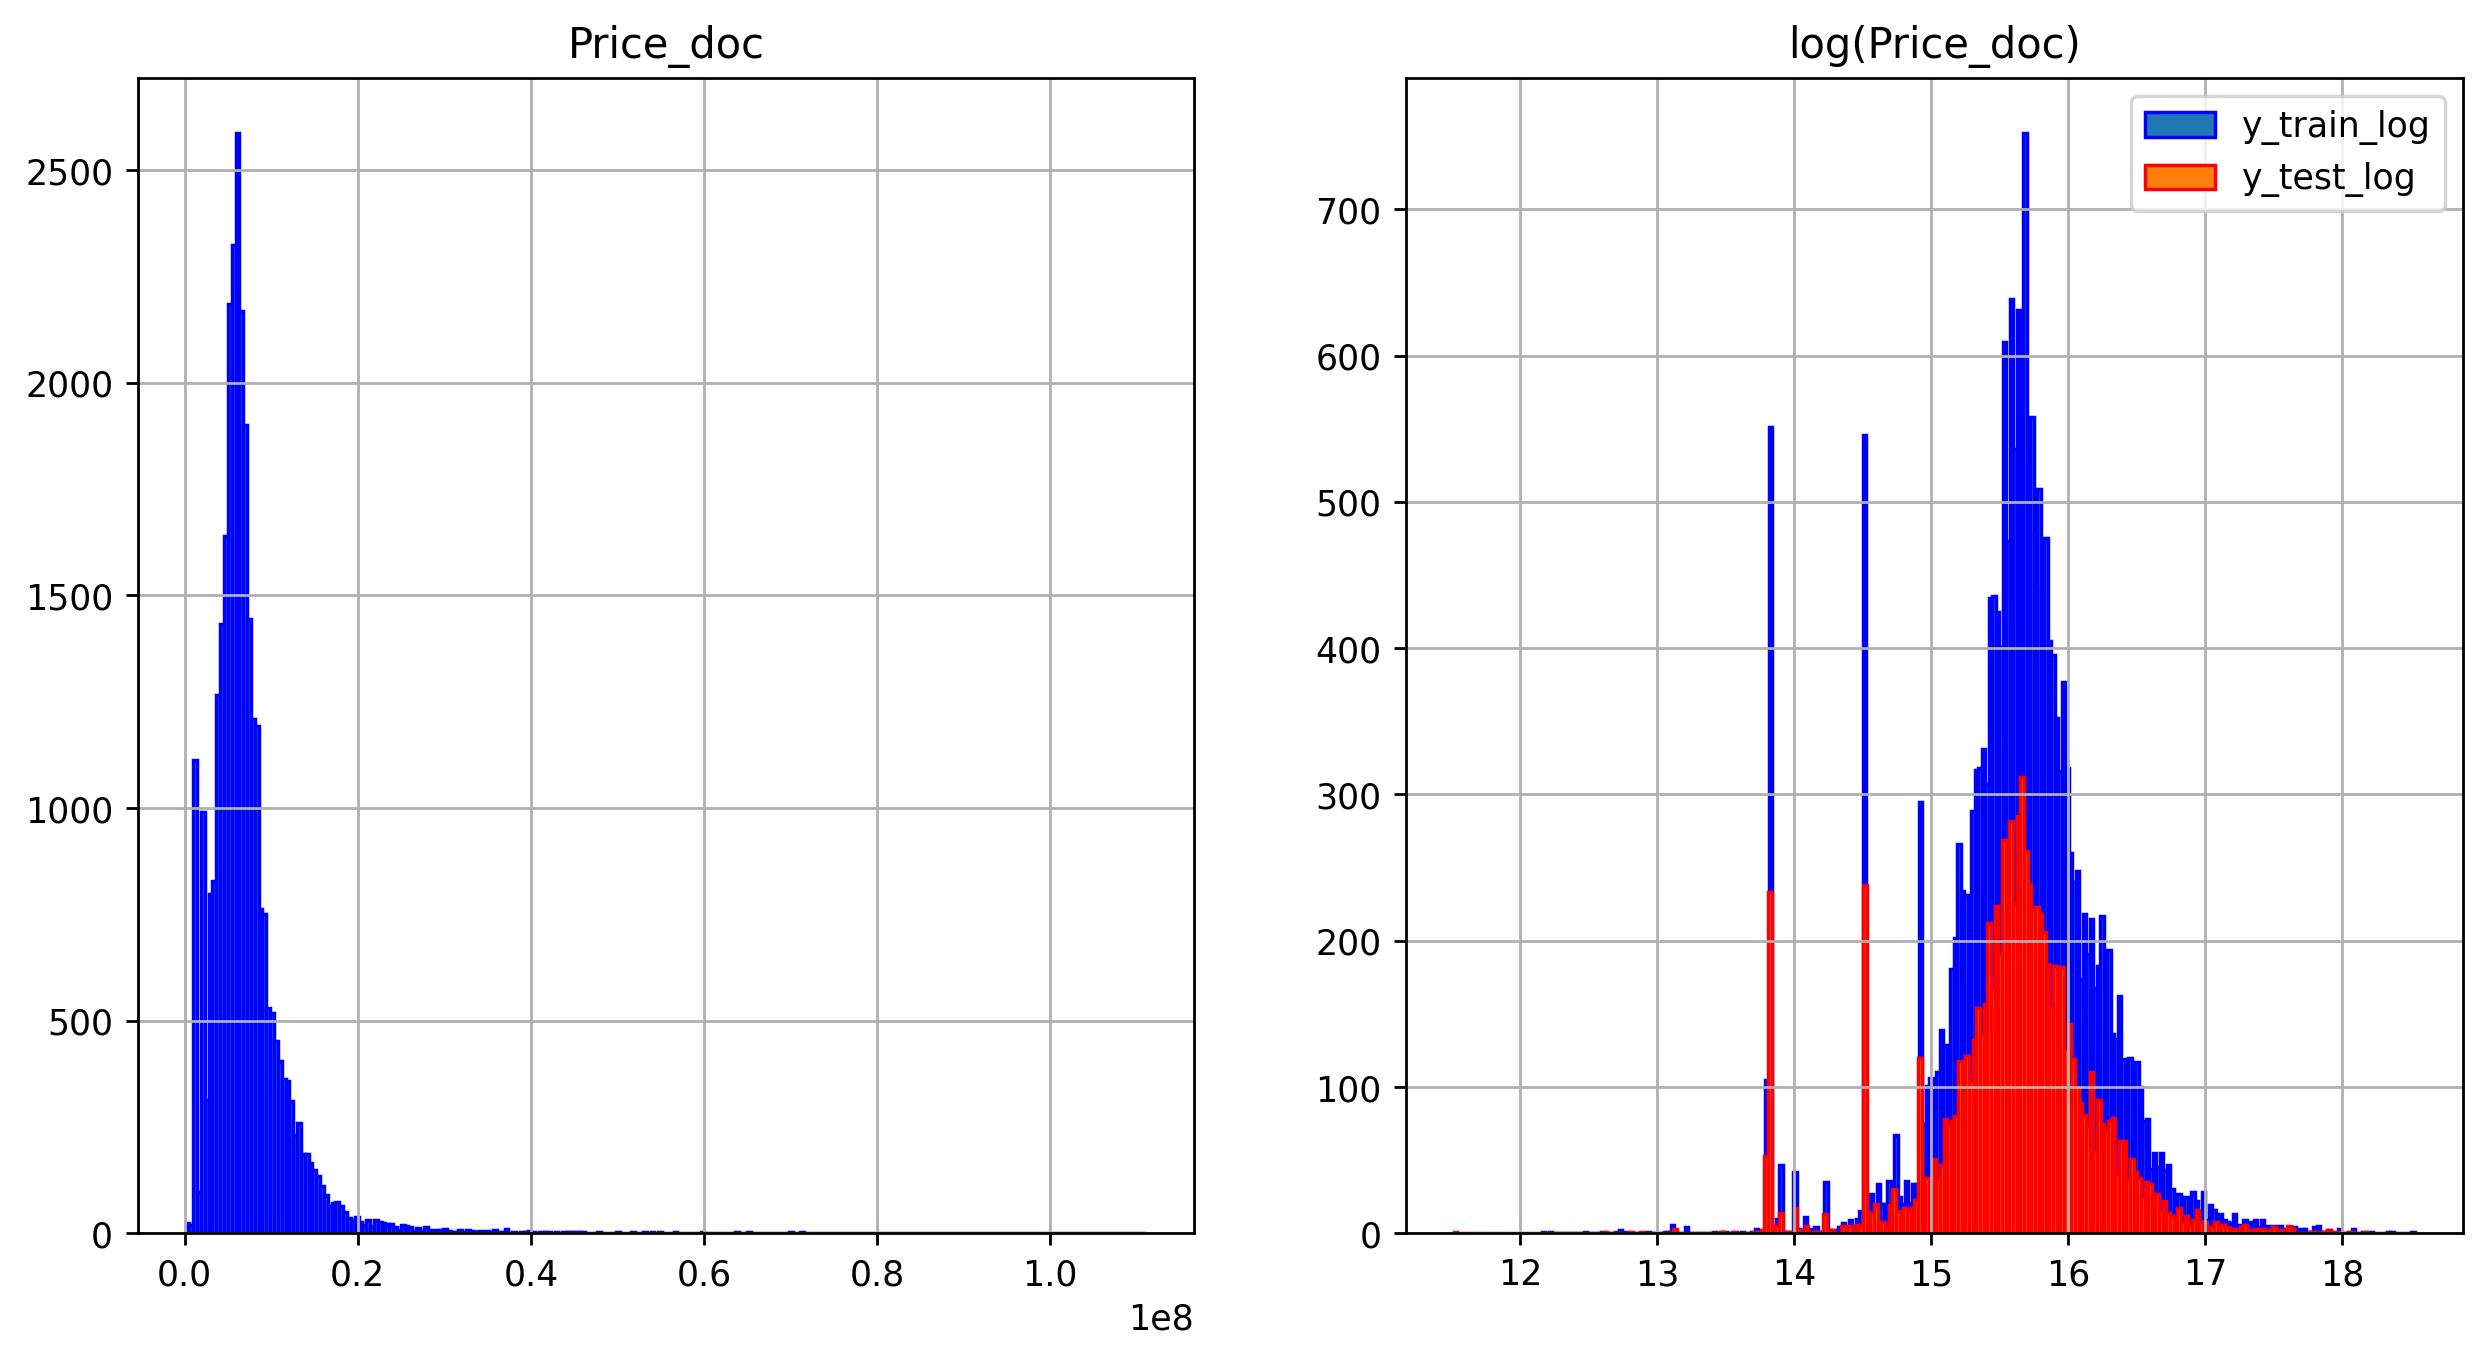

In [85]:
### BEGIN Solution (do not delete this comment)

# Plot the histogram of the original 'y' values
plt.figure(figsize=(12, 6), dpi=250)
plt.subplot(1, 2, 1)
plt.hist(y, bins=250, edgecolor='blue')
plt.title('Price_doc')
plt.grid(True)

# Apply log transformation to 'y'
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Plot the histogram of log-transformed 'y' values
plt.subplot(1, 2, 2)
plt.hist(y_train_log, bins=250, edgecolor='blue', label='y_train_log')
plt.hist(y_test_log, bins=250, edgecolor='red', label='y_test_log')
plt.title('log(Price_doc)')
plt.legend()
plt.grid(True)

plt.show()

### END Solution (do not delete this comment)

**8.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [86]:
### BEGIN Solution (do not delete this comment)

print(f"Train size = {X_train.shape}")
print(f"Test size = {X_test.shape}")

### END Solution (do not delete this comment)

Train size = (21329, 560)
Test size = (9142, 560)


**Your text answer (do not delete this comment)**:

In this scenario, there's a possibility that a significant portion of features doesn't contribute significantly to predicting the price. Specifically, we can identify certain groups of features that might be deemed irrelevant:
1. Redundant binary features generated during the OneHotEncoding process, such as water_1line and railroad_1line.
2. Features that were initially categorized as objects but are more accurately characterized as having a numerical nature, for instance, child_on_acc_pre_school.
3. Columns that exhibit a considerable number of missing NaN values.
4. Features that display a strong correlation with each other.

There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

**8.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

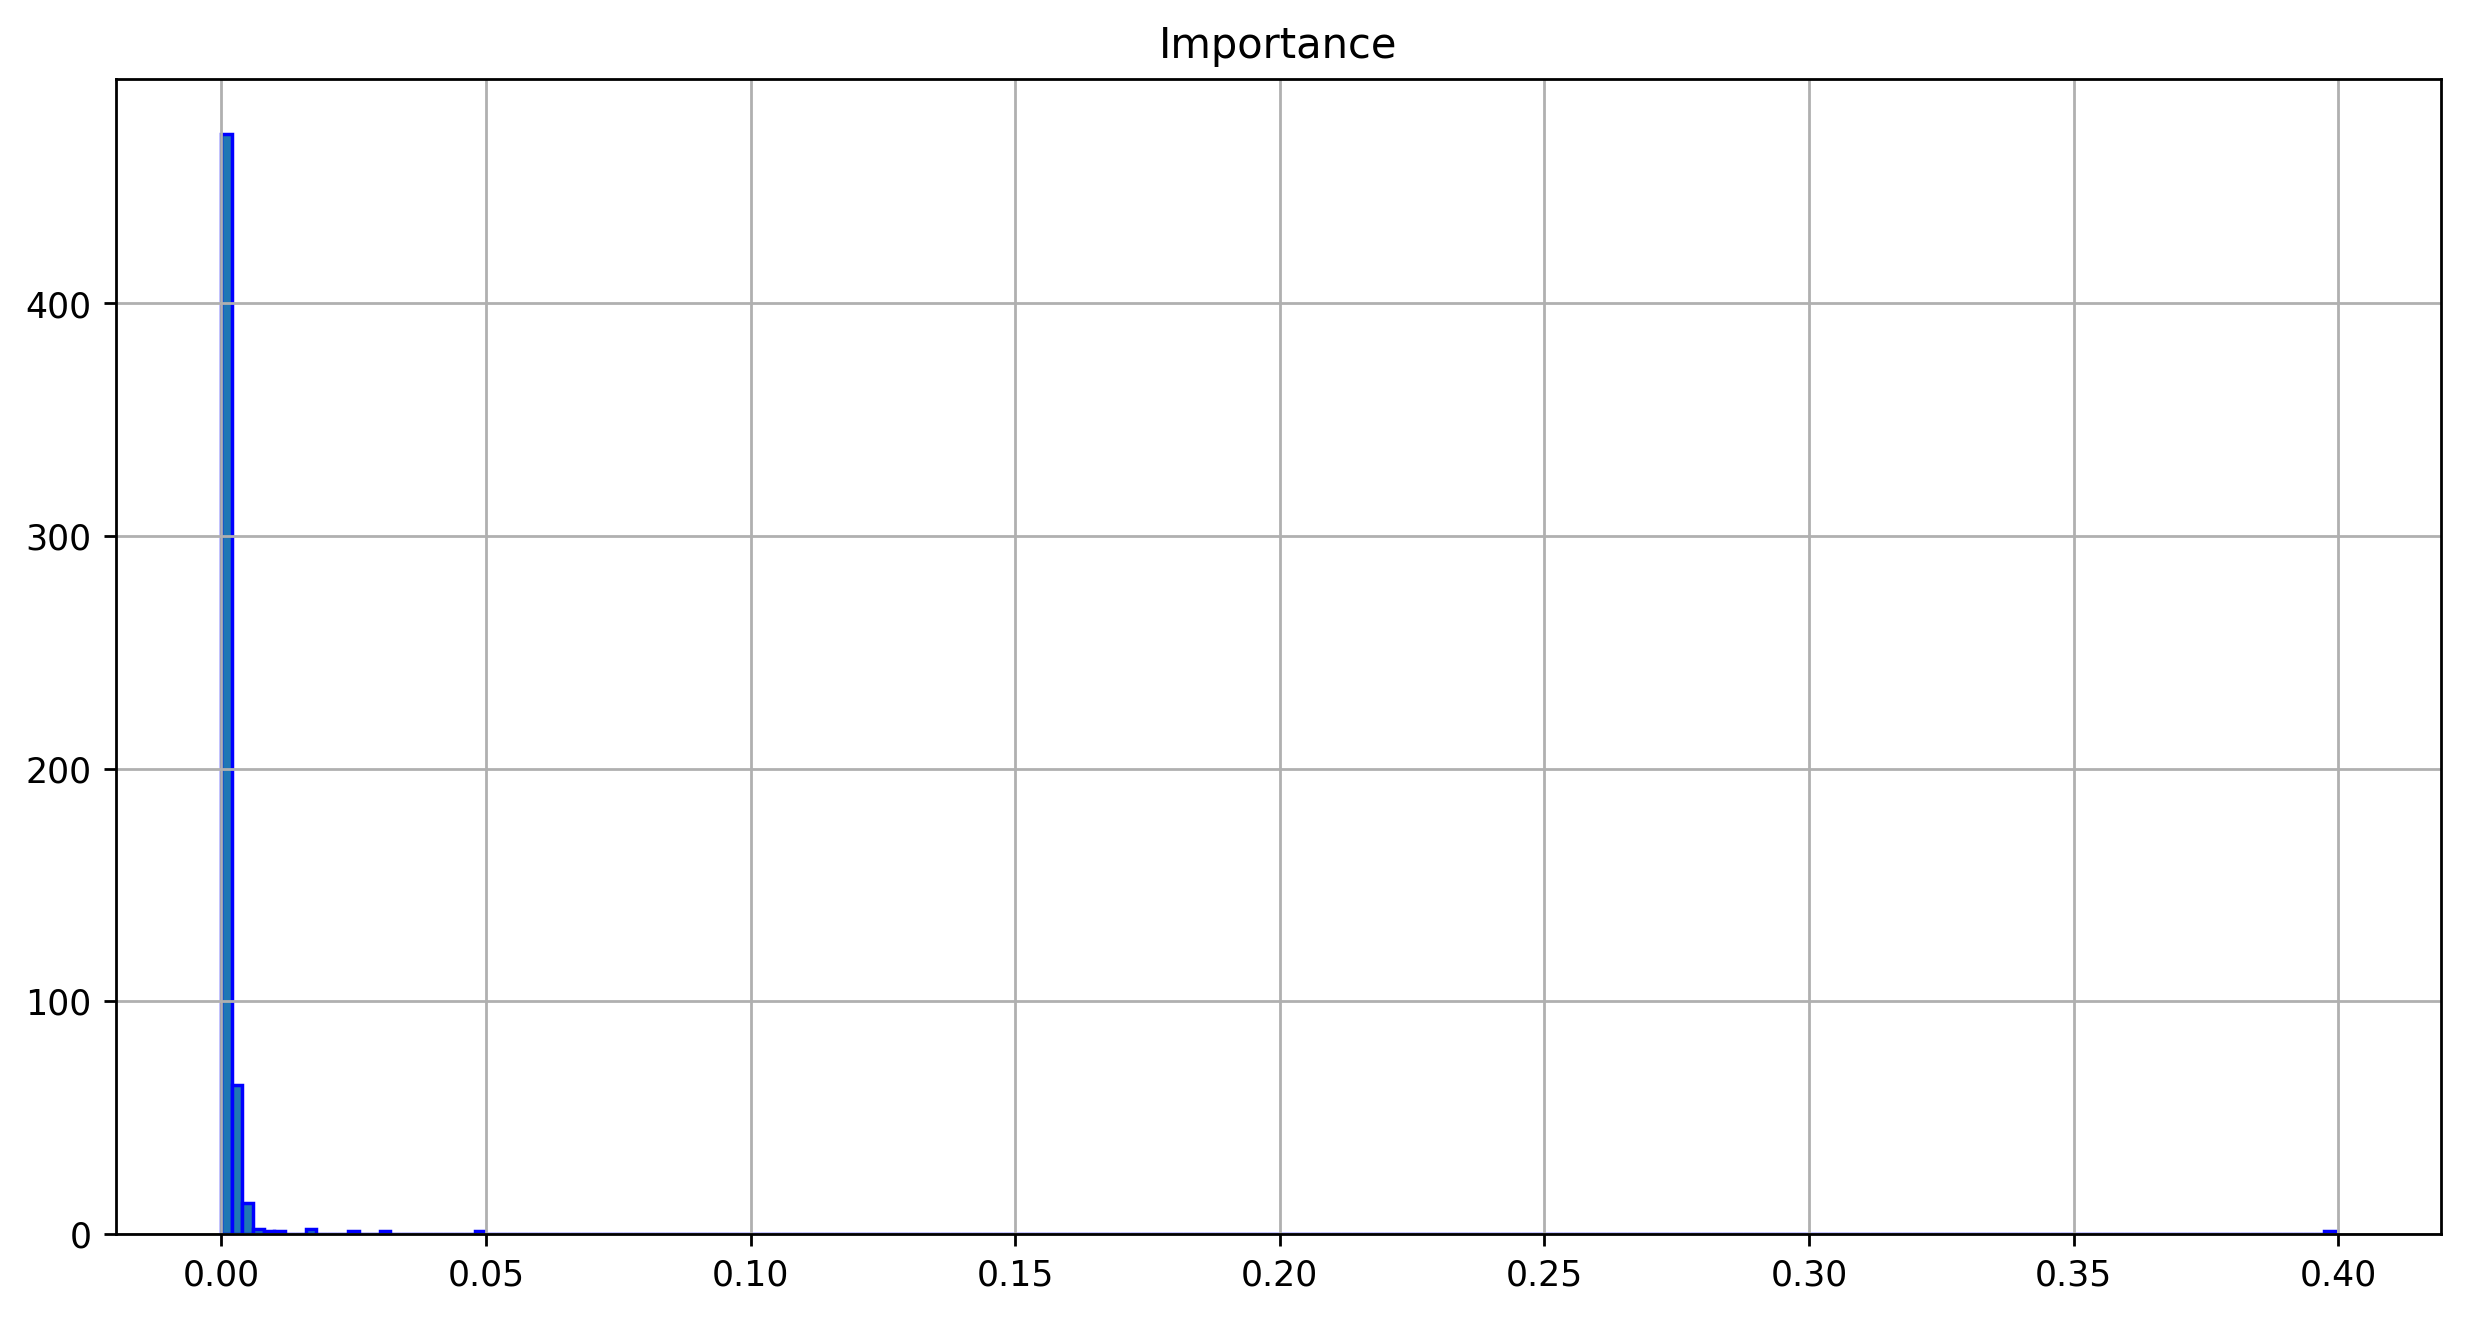

In [88]:
### BEGIN Solution (do not delete this comment)

from sklearn.ensemble import RandomForestRegressor

seed = 1

# Create a Random Forest Regressor:
rf_regressor = RandomForestRegressor(random_state=seed, n_jobs=-1)

# Fit the model on the training data:
rf_regressor.fit(X_train, y_train)

# Get feature importances:
feature_importances = rf_regressor.feature_importances_

# Plot the histogram of feature importances:
plt.figure(figsize=(12, 6), dpi=250)

plt.hist(feature_importances, bins=200, edgecolor='blue')
plt.title('Importance')
plt.grid(True)

plt.show()

### END Solution (do not delete this comment)

**8.1.7) print the names of the 20 most important features**

In [89]:
### BEGIN Solution (do not delete this comment)

# Get the indices of the top 20 features:
top_20_indices = feature_importances.argsort()[-20:][::-1]

# Get the names of the top 20 features:
top_20_feature_names = X.columns[top_20_indices]

# Print the names of the top 20 features:
print("Top 20 Most Important Features:")
for i, feature_name in enumerate(top_20_feature_names, 1):
    print(f"{i}. {feature_name}")

### END Solution (do not delete this comment)

Top 20 Most Important Features:
1. full_sq
2. cafe_count_3000
3. office_sqm_5000
4. cafe_count_2000
5. cafe_count_3000_price_2500
6. sport_count_3000
7. ttk_km
8. cafe_count_5000_price_2500
9. swim_pool_km
10. zd_vokzaly_avto_km
11. radiation_km
12. cemetery_km
13. sadovoe_km
14. fitness_km
15. kindergarten_km
16. micex_rgbi_tr
17. micex_cbi_tr
18. build_year
19. cafe_sum_1500_min_price_avg
20. cafe_count_2000_price_2500


<br>

### Subproblem 8.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets.

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. it takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)` as the input;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**8.2.1) Implement the function described above**

In [90]:
### BEGIN Solution (do not delete this comment)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np
import pandas as pd

def Train_model(X_train, y_train, X_test, y_test):

  linear_reg = LinearRegression()
  ridge_reg = Ridge()
  Random_forest = RandomForestRegressor(random_state=seed, n_jobs=-1)
  Decision_Tree = DecisionTreeRegressor(random_state=seed)

  models = [linear_reg, ridge_reg, Random_forest, Decision_Tree]

  model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Decision Tree']

    # Train models and evaluate on train and test sets:
  results = {'Model': [], 'Train error': [], 'Test error': []}

  for model, name in zip(models, model_names):
        # Train the model
    model.fit(X_train, y_train)

        # Predictions on train and test sets:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

        # Compute RMSLE:
    rmsle_train = np.sqrt(mean_squared_log_error(y_train, np.clip(y_train_pred, 0, None)))
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, np.clip(y_test_pred, 0, None)))

        # Store results:
    results['Model'].append(name)
    results['Train error'].append(rmsle_train)
    results['Test error'].append(rmsle_test)

    # Create a DataFrame from the results:
  results_df = pd.DataFrame(results)

  return results_df

### END Solution (do not delete this comment)

**8.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [91]:
### BEGIN Solution

# X_train, y_train, X_test, y_test are already defined:
comparison_results = Train_model(X_train[top_20_feature_names], y_train_log, X_test[top_20_feature_names], y_test_log)

print(comparison_results)

### END Solution

               Model  Train error  Test error
0  Linear Regression     0.033401    0.033077
1   Ridge Regression     0.033401    0.033077
2      Random Forest     0.011265    0.029518
3      Decision Tree     0.000192    0.040966


<br>

### Subproblem 8.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find them by appling the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks 8.3.1 - 8.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**8.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model's "quality".**

In [92]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """

    scores = {}

    ### BEGIN Solution

    for feature in X.columns:
      if feature not in used_features:
        features_to_use = used_features + [feature]
        X_subset = X[features_to_use]
        score = cross_val_score(model, X_subset, y, cv=cv, scoring=make_scorer(mean_squared_error))
        scores[feature] = score.mean()

    ### END Solution

    return scores

**8.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in the subtask 1 above) that would**

**- compute the model's "quality" over currently *unused* features**

**- find the feature, which has given the best score and add to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feauture to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [93]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """

    feat_best_list = []

    ### BEGIN Solution

    def get_best_feature(X, y, model, used_features):
        scores = {}

        for feature in X.columns:
            if feature not in used_features:
                features_to_use = used_features + [feature]
                X_subset = X[features_to_use]
                score = cross_val_score(model, X_subset, y, cv=3, scoring=make_scorer(mean_squared_error))
                scores[feature] = score.mean()

        best_feature = min(scores, key=scores.get)
        return best_feature, scores[best_feature]

    feat_best_list = []
    current_score = float('inf')
    rounds_no_improvement = 0

    while rounds_no_improvement < n_rounds:
        best_feature, score = get_best_feature(X, y, model, feat_best_list)

        if score < current_score:
            feat_best_list.append(best_feature)
            current_score = score
            print(f"Current best features: {feat_best_list}")
            rounds_no_improvement = 0
        else:
            rounds_no_improvement += 1

    ### END Solution

    return feat_best_list


**8.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [94]:
### BEGIN Solution

from sklearn.metrics import mean_squared_error

# Initialize DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=seed)

# Use the forward feature selection algorithm
best_features = forward_steps(X_train, y_train, n_rounds=2, model=tree_model)

# Print the final selected features
print("Best Features:", best_features)

### END Solution

Current best features: ['full_sq']
Current best features: ['full_sq', 'ecology_no data']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion', 'sub_area_Nekrasovka']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion', 'sub_area_Nekrasovka', 'big_church_count_500']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion', 'sub_area_Nekrasovka', 'big_church_count_500', 'cafe_count_1500_price_high']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion', 'sub_area_Nekrasovka', 'big_church_count_500', 'cafe_count_1500_price_high', 'sub_area_Jakimanka']
Current best features: ['full_sq', 'ecology_no data', 'culture_objects_top_25_raion', 'sub_area_Nekrasovka', 'big_church_count_500', 'cafe_count_1500_price_high', 'sub_area_Jakimanka', "sub_area_Mar'ina Roshha"]
Best Features: ['full_s

**8.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.**

In [ ]:
### BEGIN Solution

#print('EXPECTED OUTPUT FORMAT')
#comparator(X_train[X_train.columns[forward_alg_features]], y_train_log, X_test[X_train.columns[forward_alg_features]], y_test_log)

# Models:
My_model = Train_model(X_train[best_features], y_train_log, X_test[best_features], y_test_log)

print(My_model)

### END Solution

               Model  Train error  Test error
0  Linear Regression     0.034454    0.034071
1   Ridge Regression     0.034454    0.034070
2      Random Forest     0.029036    0.030761
3      Decision Tree     0.028873    0.031425


<br>

## Task 9. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [ ]:
data = pd.read_csv('Data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00,7
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own.

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [ ]:
import time
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

### BEGIN Solution (do not delete this comment)

# Define the algorithms:
algorithms = [
    ("Decision Tree", DecisionTreeClassifier(max_depth=7)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=3)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Logistic Regression", LogisticRegression())
]

# Define the multiclass strategies:
strategies = [
    ("Multiclass", None),
    ("One-vs-Rest", OneVsRestClassifier),
    ("One-vs-One", OneVsOneClassifier)
]

# Prepare the results table:
results = {
    "Algorithm": [],
    "Strategy": [],
    "Time (s)": [],
    "Validation Score": []
}

# Iterate over algorithms and strategies:
for algorim_name, algorim in algorithms:
    for strat_name, strat in strategies:

        # Construct the classifier with the specified strategy:
        if strat is not None:
            classifier = strat(algorim)
        else:
            classifier = algorim

        # Measure time and performance using cross-validation:
        start_time = time.time()
        cv_scores = cross_val_score(classifier, X, y, cv=KFold(n_splits=5, shuffle=True), scoring='accuracy')
        end_time = time.time()

        # Append results to the table:
        results["Algorithm"].append(algorim_name)
        results["Strategy"].append(strat_name)
        results["Time (s)"].append(end_time - start_time)
        results["Validation Score"].append(cv_scores.mean())

# Display the results in a DataFrame:
results_df = pd.DataFrame(results)

print(results_df)

### END Solution (do not delete this comment)

              Algorithm     Strategy  Time (s)  Validation Score
0         Decision Tree   Multiclass  0.021759          0.663012
1         Decision Tree  One-vs-Rest  0.087840          0.597453
2         Decision Tree   One-vs-One  0.073211          0.687375
3         Random Forest   Multiclass  0.531722          0.700664
4         Random Forest  One-vs-Rest  3.461441          0.724142
5         Random Forest   One-vs-One  7.739835          0.715615
6                   KNN   Multiclass  0.026626          0.649723
7                   KNN  One-vs-Rest  0.089259          0.654153
8                   KNN   One-vs-One  0.275824          0.654042
9   Logistic Regression   Multiclass  0.095062          0.602990
10  Logistic Regression  One-vs-Rest  0.327597          0.555814
11  Logistic Regression   One-vs-One  0.736737          0.622038


**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:


I opted to optimize the cross-validation process using the balanced accuracy metric. This choice is motivated by the presence of imbalances within the dataset, where certain classes may be underrepresented. Unlike traditional accuracy, balanced accuracy provides a more comprehensive evaluation by considering the average recall across all classes. In scenarios with imbalanced datasets, relying solely on accuracy might lead to a skewed understanding of model performance, particularly favoring the majority class. By prioritizing balanced accuracy, the objective is to foster a model that exhibits strong performance across all classes, mitigating biases towards the more prevalent class.

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?**

**Your text answer (do not delete this comment)**:


The performance of OneVSRest (OvR) and OneVSOne (OvO) strategies is contingent upon the algorithm type and dataset characteristics.

OvR tends to exhibit effectiveness when applied to algorithms such as Logistic Regression and Support Vector Machines (SVM) in the context of multi-class classification.
OvO may be the preferred choice, especially with algorithms like Support Vector Machines, when dealing with datasets that are not excessively large, or when the number of classes is relatively small.

In the case of Decision Trees and Random Forests, OvR might prove to be more computationally efficient, particularly when there are numerous classes involved.
Given that Logistic Regression is inherently a binary classifier, the adoption of OvO may not yield a significant improvement in performance for this specific problem.

Examine the outcomes presented in the results table, paying attention to instances where either OvR or OvO consistently demonstrates superior performance without a notable increase in computation time across each algorithm. Identify patterns indicating when a specific strategy proves more advantageous for the given problem and algorithm pairing.

# Task 10. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them.

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on test set for each of the models.
* Train the metaclassifier on the original datasets features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [ ]:
from sklearn import datasets
fc = sklearn.datasets.fetch_covtype()

Write meta classifier function.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score

def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking.
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators.
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.

    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.


    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

    """
    ### BEGIN Solution (do not delete this comment)

  # Split the data into train and test sets:
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

    # Train the base classifiers:
    for i, base_clf in enumerate(base_clfs):
        base_clf.fit(X_train, y_train)
        y_pred_base = base_clf.predict(X_test)
        accuracy_base = accuracy_score(y_test, y_pred_base)
        print(f"Base Classifier {i+1} Accuracy: {accuracy_base:.4f}")

    # Train the meta-classifier on the original dataset features:
    stacking_clf = StackingClassifier(estimators=[(f"base_clf_{i+1}", clf) for i, clf in enumerate(base_clfs)],
                                      final_estimator=final_classifier, cv=cv)

    stacking_clf.fit(X_train, y_train)
    y_pred_stacking = stacking_clf.predict(X_test)
    accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
    print(f"Stacking Classifier Accuracy (on original features): {accuracy_stacking:.4f}")

    # Train the meta-classifier with cross-validation:
    y_pred_cv = cross_val_predict(stacking_clf, X_train, y_train, cv=cv, method='predict')

    # Retrain the base classifiers on the whole training set:
    for base_clf in base_clfs:
        base_clf.fit(X_train, y_train)

    # Train the final classifier on the predictions from the base classifiers:
    final_classifier.fit(y_pred_cv.reshape(-1, 1), y_train)

    # Test the final classifier on the original test set:
    y_pred_final = final_classifier.predict(y_pred_stacking.reshape(-1, 1))
    accuracy_final = accuracy_score(y_test, y_pred_final)
    print(f"Stacking Classifier Accuracy (with cross-validation): {accuracy_final:.4f}")

    ### END Solution (do not delete this comment)
    pass

### Subproblem 10.1 (1 point)

**10.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [ ]:
### BEGIN Solution (do not delete this comment)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset:
X, y = fc.data, fc.target

# Split the dataset into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the base classifiers:
base_classifier_1 = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)
base_classifier_2 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
base_classifier_3 = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1)
base_classifier_4 = GaussianNB()
base_classifier_5 = DecisionTreeClassifier(max_depth=3, random_state=42)
base_classifier_6 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=42)

# List of base classifiers:
base_classifiers = [base_classifier_1, base_classifier_2, base_classifier_3, base_classifier_4, base_classifier_5, base_classifier_6]

# Define the final classifier:
final_classifier = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1)

# Train the meta-classifier:
meta_classifier(base_classifiers, final_classifier, X_train, X_test, y_train, cv=5)

### END Solution (do not delete this comment)

Base Classifier 1 Accuracy: 0.9283
Base Classifier 2 Accuracy: 0.9521
Base Classifier 3 Accuracy: 0.6179
Base Classifier 4 Accuracy: 0.4570
Base Classifier 5 Accuracy: 0.6760
Base Classifier 6 Accuracy: 0.7426
Stacking Classifier Accuracy (on original features): 0.9602
Stacking Classifier Accuracy (with cross-validation): 0.9430


**10.1.2) Report individual scores on test set. As a score use accuracy.**

In [ ]:
### BEGIN Solution (do not delete this comment)

from sklearn.metrics import accuracy_score

# Train and evaluate each base classifier individually:
for i, base_classifier in enumerate(base_classifiers, 1):
    # Fit the base classifier on the training set:
    base_classifier.fit(X_train, y_train)

    # Predictions on the test set:
    y_pred = base_classifier.predict(X_test)

    # Calculate and print accuracy:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Base Classifier {i} Accuracy: {accuracy:.4f}")

### END Solution (do not delete this comment)

Base Classifier 1 Accuracy: 0.9428
Base Classifier 2 Accuracy: 0.9644
Base Classifier 3 Accuracy: 0.6196
Base Classifier 4 Accuracy: 0.4576
Base Classifier 5 Accuracy: 0.6756
Base Classifier 6 Accuracy: 0.7471


### Subproblem 10.2 (1 point)

**10.2.1) Train metaclassifier on original datasets features. And report score on test.**

In [ ]:
### BEGIN Solution (do not delete this comment)

# Fit the final classifier on the original dataset features:
final_classifier.fit(X_train, y_train)

# Predictions on the test set using the meta-classifier:
y_pred_meta = final_classifier.predict(X_test)

# Calculate and print accuracy on test set:
accuracy_meta = accuracy_score(y_test, y_pred_meta)
print(f"Meta-Classifier Accuracy on Test Set: {accuracy_meta:.4f}")

### END Solution (do not delete this comment)

Meta-Classifier Accuracy on Test Set: 0.6196


**10.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [ ]:
### BEGIN Solution (do not delete this comment)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Initialize an empty array to store base models predictions on the training set:
base_models_predictions = []

# Perform n-fold cross-validation for each base model:
for base_model in base_classifiers:
    # Get cross-validated predictions for the current base model:
    base_model_predictions_cv = cross_val_predict(base_model, X_train, y_train, cv=5)
    base_models_predictions.append(base_model_predictions_cv)

# Stack the cross-validated predictions along the columns to form the meta-training set:
X_train_meta = np.column_stack(base_models_predictions)

# Fit the final classifier on the meta-training set:
final_classifier.fit(X_train_meta, y_train)

# Retrain the base models on the whole training set:
for base_model in base_classifiers:
    base_model.fit(X_train, y_train)

# Generate predictions from base models on the test set:
base_models_predictions_test = [base_model.predict(X_test) for base_model in base_classifiers]

# Stack the predictions along the columns to form the meta-test set:
X_test_meta = np.column_stack(base_models_predictions_test)

# Predictions on the test set using the meta-classifier:
y_pred_meta = final_classifier.predict(X_test_meta)

# Calculate and print accuracy on test set:
accuracy_meta = accuracy_score(y_test, y_pred_meta)
print(f"Accuracy of metaclassifier on original datasets features on test: {accuracy_meta:.4f}")

### END Solution (do not delete this comment)

Accuracy of metaclassifier on original datasets features on test: 0.9420


**10.2.3) Does stacking helped to gain better score?**

**Your text answer (do not delete this comment)**:

Stacking has helped to gain better score in comparison with single models by their own. The least score difference between stacking is base_classifier_2 KNeighborsClassifier score.
The final verdict on whether stacking helps gain a better score depends on the specific dataset and the characteristics of the base classifiers. Comparing the accuracy scores of individual classifiers with the stacked approach can provide insights into whether combining models improves predictive performance. In some cases, stacking may lead to better generalization and improved accuracy, while in others, the individual models may already perform well, and stacking might not yield significant benefits.